# Introduction of fashion_mnist dataset

In this colab, we use the  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which contains 70000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 $\times$ 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table> 

The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

# Load data and data preprocess

## Load data

if you wanna see more information about tensorflow_datasets, you can visit https://tensorflow.google.cn/datasets

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
# tfds works in both eager and graph modes, we'll run in eager mode. You must add this line of code to the beginning of the program.
tf.enable_eager_execution()

In [3]:
# here we can see available datasets.
# The function 'list_builders()' will return a list including names of available datasets.
if 'fashion_mnist' in tfds.list_builders():
  print("Yes")

Yes


 'fashion_mnist' is in the support list, so we can load this dataset.

In [4]:
# if as_supervised = True, the returned Dataset will have a 2-tuple structure (input, label)
# if with_info = True, tfds.load will return the tuple (tf.data.Dataset, tfds.core.DatasetInfo) containing the
# information associated with the builder.
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
# Here we divide the dataset into a train_dataset and a test_dataset.
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Colocations handled automatically by placer.


W0909 11:24:04.304004 139907463014144 deprecation.py:323] From /root/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0909 11:24:04.377645 139907463014144 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

we can see that there are 60000 images in the train_dataset and 10000 images in the test set from metadata.

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## Data preprocess

The value of each pixel in the image data is an integer in the range `[0,255]`. For the model to work properly, these values need to be normalized to the range `[0,1]`. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [7]:
paddings = tf.constant([[2, 2], [2, 2], [0, 0]])
def normalize(images, labels):
  images = tf.pad(images, paddings)
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

## Explore the processed data

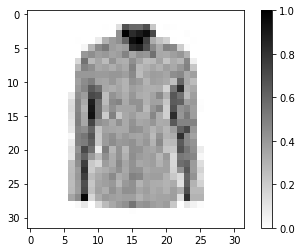

In [8]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((32,32))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

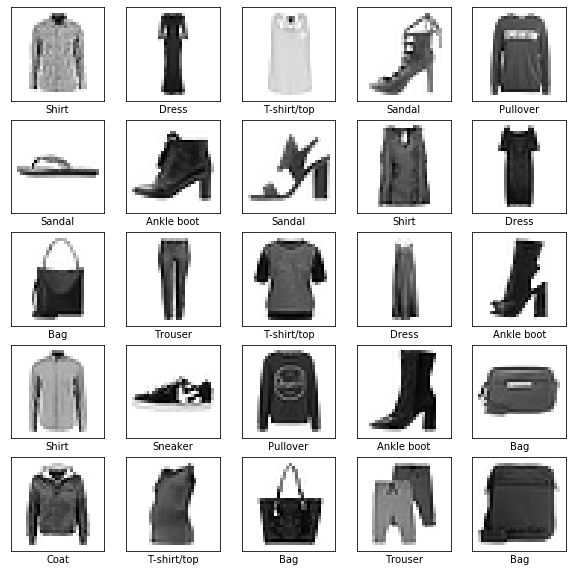

In [9]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((32,32))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

# Introduction of LeNet-5 model architecture

<table>
  <tr><td>
    <img src="https://github.com/udacity/CarND-LeNet-Lab/blob/master/lenet.png?raw=true"
         alt="LeNet-5" width="900">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2.</b> LeNet-5 model architecture (by Yan LeCun, MIT License).<br/>&nbsp;
  </td></tr>
</table> 

# Build the LeNet-5 model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4726 - acc: 0.8281
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3203 - acc: 0.8804
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2684 - acc: 0.9014
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2409 - acc: 0.9107
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2191 - acc: 0.9180
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1983 - acc: 0.9257
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1801 - acc: 0.9317
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1654 - acc: 0.9370
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1530 - acc: 0.9415
Epoch 10/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1377 - acc: 0.9484


# Evaluate accuracy

In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 5ms/step - loss: 0.2981 - acc: 0.9069
Accuracy on test dataset: 0.9069


# Make predictions and explore

In [15]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [16]:
predictions[0]

array([7.6867053e-07, 9.6271293e-09, 1.1363774e-05, 1.7797712e-08,
       4.1678861e-02, 8.6299535e-12, 9.5830905e-01, 6.5203216e-12,
       6.3919732e-09, 7.5312282e-12], dtype=float32)

In [17]:
np.argmax(predictions[0])

6

In [18]:
test_labels[0]

6

In [19]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

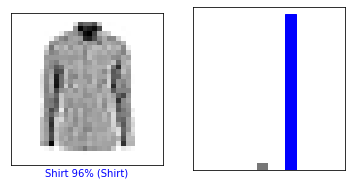

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

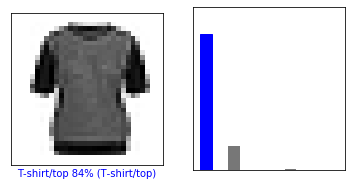

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

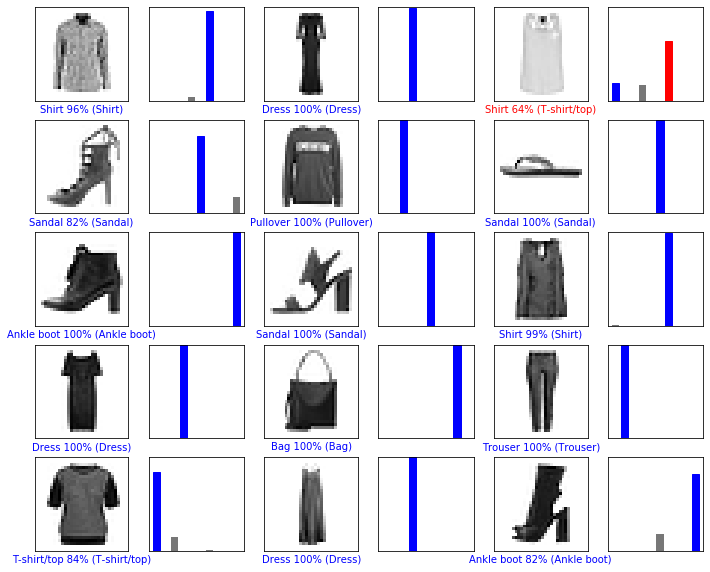

In [22]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [23]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(32, 32, 1)


In [24]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 32, 32, 1)


In [25]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.68670532e-07 9.62712932e-09 1.13637625e-05 1.77976762e-08
  4.16788608e-02 8.62995352e-12 9.58309054e-01 6.52030903e-12
  6.39197317e-09 7.53122825e-12]]


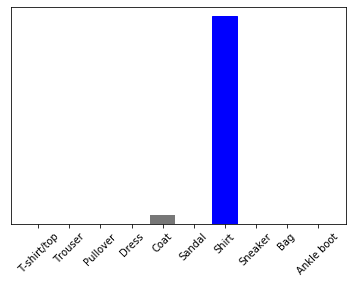

In [26]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

6